##### 1. 라이브러리 로드

In [6]:
import sys
import os
sys.path.append("C:/Users/USER/OneDrive/문서/인턴/특징벡터 추출/img2vec_pytorch")  # Adds higher directory to python modules path.
from img_to_vec import Img2Vec
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

#### 2. 특징벡터 파일 로드
##### 2-1. 형태소의 특징 벡터 파일 로드

In [7]:
bbichim_df = pd.read_csv('형태소별 특징벡터/bbichim_clustering_feature_vector.csv').drop(columns = ['fontname'])
buri_df = pd.read_csv('형태소별 특징벡터/buri_clustering_feature_vector.csv').drop(columns = ['fontname'])
kkeokim_df = pd.read_csv('형태소별 특징벡터/kkeokim_clustering_feature_vector.csv').drop(columns = ['fontname'])
kkokjijum_df = pd.read_csv('형태소별 특징벡터/kkokjijum_clustering_feature_vector.csv').drop(columns = ['fontname'])
sangtu_df = pd.read_csv('형태소별 특징벡터/sangtu_clustering_feature_vector.csv').drop(columns = ['fontname'])

##### 2-2. 클러스터의 중심점 벡터 파일 로드

In [8]:
bbichim_centroid = pd.read_csv("클러스터 중심점/bbichim_cluster_centers_.csv")
buri_centroid = pd.read_csv("클러스터 중심점/buri_cluster_centers_.csv")
kkeokim_centroid = pd.read_csv("클러스터 중심점/kkeokim_cluster_centers_.csv")
kkokjijum_centroid = pd.read_csv("클러스터 중심점/kkokjijum_cluster_centers_.csv")
sangtu_centroid = pd.read_csv("클러스터 중심점/sangtu_cluster_centers_.csv")

#### 3. 입력이미지 형태소의 특징벡터 추출

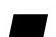

In [33]:
img = Image.open('./test_img_2/Kkokjijum.png')
img

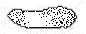

In [54]:
img2 = Image.open('./test_img_3/Buri.png').convert('RGB')
img2

In [56]:
img_array = np.array(img2)
img_array.shape

(34, 86, 3)

In [57]:
img2vec =Img2Vec(model="inception")

vec = img2vec.get_vec(img2)
vec

AdaptiveAvgPool2d(output_size=(1, 1))


array([0.5033937 , 0.1997673 , 0.12406343, ..., 0.19919871, 0.00839331,
       1.3770387 ], dtype=float32)

In [66]:
img2vec =Img2Vec(model="inception")

### 테스트 폰트 경로
input_path = './test_img_3/'

list_pics = []
filenames = []
for file in os.listdir(input_path):
  filename = os.fsdecode(file)
  img = Image.open(os.path.join(input_path, filename)).convert('RGB')
  list_pics.append(img)
  filenames.append(filename)

vectors1 = img2vec.get_vec(list_pics)

pics = {}
for i, vec in enumerate(vectors1):
  pics[filenames[i]] = vec

AdaptiveAvgPool2d(output_size=(1, 1))
(3, 2048)


#### 3. 클러스터링 관련 함수

##### 3-1. PCA(차원축소)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def data_pca(df, n):
  scaler = StandardScaler()
  X_scaled=scaler.fit_transform(df)
  #n차원으로 축소
  pca=PCA(n_components=n)
  pca.fit(X_scaled)
  X_pca=pca.transform(X_scaled)
  df_pca =pd.DataFrame(X_pca)
  return df_pca

##### 3-2. DataFrame에 폰트명 추가

In [68]:
def add_fontname(df_pca):
  fontname = ["텐바이텐 폰트", "텐바이텐 폰트 Bold", "116앵무부리", "116수박화체", "12롯데마트드림Bold", "12롯데마트드림Light", "12롯데마트드림Medium", "12롯데마트행복Bold", "12롯데마트행복Light", "12롯데마트행복Medium", "도서관체", "성동고딕", "성동고딕B", "경기천년제목 Bold", "경기천년제목 Medium", "경기천년제목V Bold", "경기천년바탕 Bold", "경기천년바탕 Regular", "빛고을광주체 Light", "빛고을광주체 Medium", "빛고을광주체 Bold", "김포평화바탕", "순천체R", "순천체B", "전주완판본 순체 B", "전주완판본 순체 L", "전주완판본 순체 R", "전주완판본 각체 B", "전주완판본 각체 L", "전주완판본 각체 R", "유토이미지 고딕 R", "유토이미지 별나라달님체", "유토이미지 빨간우체통체", "유토이미지 플라워체", "유토이미지체", "유토이미지 고딕 B", "유토이미지 고딕 L", "아리따 부리 B", "아리따 부리 L", "아리따 부리 M", "아리따 부리 SB", "애터미체 Bold", "애터미체 Light", "애터미체 Medium", "a타이틀고딕2", "a타이틀고딕3", "a타이틀고딕4", "바른바탕체 B", "바른바탕체 L", "바른바탕체 M", "바탕체", "넥슨 배찌체", "빙그레체", "빙그레 메로나체 Bold", "빙그레 메로나", "빙그레 싸만코체 Bold", "빙그레 싸만코체", "빙그레체Ⅱ", "도현체", "을지로10년후체", "을지로체", "한나체 Air", "한나체 Pro", "한나는11살체", "주아체", "기랑해랑체", "연성체", "부산체", "카페24 당당해체", "카페24 단정해체", "카페24 동동체", "카페24 아네모네 에어체", "카페24 빛나는별체", "카페24 쑥쑥체", "카페24 숑숑체", "창원단감아삭체 Bold", "쿠키런체 Black", "쿠키런체 Bold", "디자인하우스체", "디자인하우스체 Light", "영양군 음식디미방체", "동글 Bold", "동글 Light", "동글 Regular", "도스고딕", "도스이야기 굵은체", "도스명조", "도스필기", "도스샘물", "돋움체", "둥근모꼴", "DX아리랑 B", "DX아우라", "DX작가세상 M", "DX방탄고딕", "DX봄결 ExBold", "DX블루마린라운드 ExBold", "DX어린이그림", "DX동화나라 Bold", "DX퓨리티 Bold", "DX헤드02 Bold", "DX설레임2 Medium", "DX설레임 Medium", "DX우등생 Bold", "DX한울 Bold", "DX경필명조 Bold", "DX모던고딕 Bold", "DX모던고딕 RoundBold", "DX국민시대 Regular", "DX새신문명조 Bold", "DX프로방스 Bold", "DX르네상스 Bold", "DX단선고딕 Thin", "DX신문명조", "DX스피드 Medium", "DX우리강산 Bold", "EBS주시경B", "EBS주시경L", "EBS주시경M", "마초체", "엘리스디지털배움체 Regular", "설립체", "가비아 청연체", "가비아 마음결체", "가비아 봄바람체", "가비아 납작블럭체", "가비아 솔미체", "가나초콜릿체", "고도체 B", "고도체 M", "고양덕양체 B", "고양덕양체 EB", "굴림체", "HY그래픽M", "HY견고딕", "HY중고딕", "HY헤드라인M", "HY견명조", "HY신명조", "HY얕은샘물M", "함렡체 Black", "함렡체 Bold", "함렡체 Light", "함렡체 Regular", "한컴 백제 B", "함초롬바탕체", "함초롬바탕체 B", "한글누리체", "한글누리체 R", "한겨레결체", "한컴 바겐세일 B", "한컴 바겐세일 M", "한솔체 B", "한솔체 M", "한컴 소망 B", "한컴 소망 M", "HanS 붐붐", "윤고딕 230", "윤고딕 240", "Headline", "빛의계승자체 Bold", "빛의계승자체 Regular", "휴먼굵은팸체", "휴먼굵은샘체", "휴먼가는팸체", "휴먼가는샘체", "휴먼아미체", "휴먼고딕", "휴먼명조", "휴먼매직체", "휴먼옛체", "휴먼둥근헤드라인", "휴먼중간샘체", "HS새마을체 Regular", "HS겨울눈꽃체", "HS두꺼비체", "HS봄바람체 2.0", "HS새마을체", "HY 바다 L", "HY 바다 M", "HY 그래픽", "HY 강 B", "HY 강 M", "이롭게 바탕체", "한글재민체", "제주고딕", "제주한라산", "제주명조", "정선아리랑체", "정선아리랑혼체", "정선아리랑뿌리체", "KBIZ 한마음고딕 B", "KBIZ 한마음고딕 H", "KBIZ 한마음고딕 L", "KBIZ 한마음고딕 M", "KBIZ 한마음고딕 R", "KBIZ 한마음명조 B", "KBIZ 한마음명조 L", "KBIZ 한마음명조 M", "KBIZ 한마음명조 R", "KCC안중근체", "KCC임권택체", "KCC김훈체", "KCC은영체", "KoPub 바탕체 Bold", "KoPub 바탕체 Light", "KoPub 바탕체 Medium", "KoPub 돋움체 Bold", "KoPub 돋움체 Light", "KoPub 돋움체 Medium", "코트라 희망체", "코트라 도약체", "코트라 볼드체", "로커스 상상고딕체", "맑은 고딕", "메이플스토리 Bold", "메이플스토리 Light", "마포애민", "마포배낭여행", "마포다카포", "마포홍대프리덤", "마포마포나루", "미래로글꼴", "나눔손글씨 붓", "나눔고딕에코", "나눔고딕에코 Bold", "나눔고딕에코 ExtraBold", "나눔명조", "나눔명조에코", "나눔명조에코 Bold", "나눔명조에코 ExtraBold", "나눔손글씨 펜", "나눔스퀘어", "넷마블체 B", "넷마블체 L", "넷마블체 M", "넥센타이어체 Bold", "넥센타이어체 Regular", "닉스곤체 B 2.0", "닉스곤체 M 2.0", "ON I고딕", "원스토어 모바일POP체", "포천 오성과한음체 Bold", "포천 오성과한음체 Regular", "푸른전남체 Bold", "푸른전남체 Medium", "푸른전남체", "평창평화체 Bold", "평창평화체 Light", "노회찬체", "삼국지3글꼴", "상주다정다감체", "상주곶감체", "상주경천섬체", "산돌독수리체", "산돌이야기체", "세방고딕 Bold", "세방고딕", "서울남산체", "SF망고빙수", "스포카 한 산스 Bold", "스포카 한 산스 Light", "스포카 한 산스 Regular", "스포카 한 산스 Thin", "정묵바위체", "순바탕 Bold", "순바탕 Light", "순바탕 Medium", "태-조각TB", "태-으뜸B", "THE뉴스속보", "THE명품굴림B", "THE선인장", "THE정직", "티몬체", "tvN 즐거운이야기 Bold", "tvN 즐거운이야기 Light", "tvN 즐거운이야기 Medium", "티웨이 항공체", "티웨이 날다체", "티웨이 하늘체", "타이포 발레리나 B", "타이포 발레리나 M", "타이포 도담", "타이포 돈키왕자 M", "타이포 어울림 B", "타이포 어울림 L", "타이포 어울림 M", "타이포 홍익인간 M", "타이포 정조 M", "타이포 세종대왕 훈민", "타이포 달꽃", "타이포 명탐정", "타이포 씨고딕180", "타이포 씨명조180", "타이포 스톰 B", "어비 꿍디체", "어비 나현체 Bold", "어비 나현체", "어비 남지은체 Bold", "어비 남지은체", "어비 소윤체", "어비 선홍체 BOLD", "어비 선홍체", "어비 스윗체", "어비 순수결정체 Bold", "어비 순수결정체", "양굵은구조고딕", "양평군체 B", "양평군체 L", "양평군체 M", "Y이드스트릿체 B", "Y이드스트릿체 L", "영도체", "양재깨비체M", "청소년체", "강한육군 Bold Vert", "강한육군 Bold", "강한육군 Medium Vert", "강한육군 Medium", "경기천년제목 Light", "고양일산 R", "국립박물관문화재단클래식B", "국립박물관문화재단클래식L", "국립박물관문화재단클래식M", "국립중앙도서관글자체", "나눔손글씨 가람연꽃", "나눔손글씨 갈맷글", "나눔손글씨 강부장님체", "나눔손글씨 고딕 아니고 고딩", "나눔손글씨 고려글꼴", "나눔손글씨 곰신체", "나눔손글씨 규리의 일기", "나눔손글씨 김유이체", "나눔손글씨 꽃내음", "나눔손글씨 끄트머리체", "나눔손글씨 다행체", "나눔손글씨 대광유리", "나눔손글씨 딸에게 엄마가", "나눔손글씨 반짝반짝 별", "나눔손글씨 세계적인 한글", "나눔손글씨 세아체", "나눔손글씨 세화체", "나눔손글씨 소방관의 기도", "나눔손글씨 시우 귀여워", "나눔손글씨 신혼부부", "나눔손글씨 아빠의 연애편지", "나눔손글씨 아줌마 자유", "나눔손글씨 엄마사랑", "나눔손글씨 와일드", "나눔손글씨 외할머니글씨", "나눔손글씨 유니 띵땅띵땅", "나눔손글씨 자부심지우", "나눔손글씨 잘하고 있어", "나눔손글씨 장미체", "나눔손글씨 점꼴체", "나눔손글씨 정은체", "나눔손글씨 중학생", "나눔손글씨 진주 박경아체", "나눔손글씨 철필글씨", "나눔손글씨 칼국수", "나눔손글씨 코코체", "나눔손글씨 한윤체", "나눔손글씨 행복한 도비", "나눔손글씨 혜준체", "나눔손글씨 희망누리", "나눔손글씨 흰꼬리수리", "동그라미재단B", "동그라미재단L", "동그라미재단M", "문화재돌봄체 Bold", "문화재돌봄체 Regular", "배스킨라빈스 B", "비트로 코어체", "비트로 프라이드체", "서울남산 장체 B", "서울남산 장체 BL", "서울남산 장체 EB", "서울남산 장체 L", "서울남산 장체 M", "서울한강 장체 B", "서울한강 장체 BL", "서울한강 장체 EB", "서울한강 장체 L", "서울한강 장체 M", "솔뫼 김대건 Light", "솔뫼 김대건 Medium", "솔인써니체", "양진체", "온글잎 경영체", "온글잎 만두몽키체", "온글잎 무궁체", "온글잎 민혜체", "온글잎 보현체", "온글잎 석영체", "온글잎 안될과학궤도체", "온글잎 안될과학약체", "온글잎 안될과학유니랩장체", "온글잎 윤우체", "온글잎 의연체", "온글잎 해솜체", "이순신돋움체B", "이순신돋움체L", "이순신돋움체M", "조선일보명조", "중나좋체 Light", "중나좋체 Medium", "한글틀고딕", "한수원_한돋음_B", "한돋음체 R", "한울림체 R", "해수체B", "해수체L", "해수체M", "행복고흥B", "행복고흥L", "행복고흥M", "헬스셋고딕Bold", "헬스셋고딕Light", "헬스셋조릿대Std"]
  fontname.append("input font")  
  df_pca.insert(0, 'fontname', fontname)
  return df_pca

##### 3-3. 클러스터링

In [69]:
def find_cluster(df, centroid, pic, pca_n, candidate_font, comparative_font_df):
  
  prev_pca = df.drop(columns=['cluster'])
  prev_pca.loc[len(df)] = pic
  
  # 입력 이미지를 포함해 전체 데이터 차원축소
  pca = data_pca(prev_pca, pca_n)
    
  # 입력 이미지의 특징벡터
  input = pca.iloc[[-1]]  

  # 입력이미지와 중심점까지의 거리를 측정해서 어느 클러스터에 속하는지 계산
  dist_to_centroid = [] 
  for idx, row in centroid.iterrows():
    dist_to_centroid.append(cosine_similarity(input.values, centroid.loc[[idx]].values)[0][0])
  input_cluster = dist_to_centroid.index(max(dist_to_centroid))
  print("input_cluster : ", input_cluster)  

  # 입력이미지와 클러스터 폰트의 유사도 계산
  similarity = []
  same_cluster_idx = df[df['cluster']==input_cluster].index
  for idx in same_cluster_idx:
    similarity.append(cosine_similarity(input.values, pca.iloc[[idx]].values)[0][0])

  # 유사도가 0.6보다 큰 폰트만 후보 폰트(최종 유사도 계산 대상 폰트)로 함
  similarity_df = add_fontname(pca).loc[same_cluster_idx, :]
  similarity_df['similarity'] = similarity
  sim_high_df = similarity_df[similarity_df['similarity'] >= 0.6]
  candidate_font = np.concatenate((candidate_font, sim_high_df['fontname'].values), axis=0)

  # 입력 삐침 형태소와의 비교를 위해 기존 폰트의 삐침 형태소를 포함시킴
  comparative_font_df = pd.concat([comparative_font_df, pca.drop(columns=['fontname'])], axis=1)
  return candidate_font, comparative_font_df

### 4. 형태소 클러스터링

In [70]:
# 입력 형태소와 비교하기 위해 기존 폰트(420)의 특징벡터를 저장할 DataFrame
# 입력 형태소가 삐침, 상투면 해당 df에도 기존 폰트의 삐침, 상투만 저장하여 비교함
comparative_font_df = pd.DataFrame()

# 입력 형태소와 같은 클러스터에 속한 폰트
candidate_font = np.array([])

In [71]:
if 'Bbichim.png' in filenames:
  candidate_font, comparative_font_df = find_cluster(bbichim_df, bbichim_centroid, pics['Bbichim.png'], 18, candidate_font, comparative_font_df)

if 'Buri.png' in filenames:
  candidate_font, comparative_font_df = find_cluster(buri_df, buri_centroid, pics['Buri.png'], 10, candidate_font, comparative_font_df)

if 'Kkeokim.png' in filenames:
  candidate_font, comparative_font_df = find_cluster(kkeokim_df, kkeokim_centroid, pics['Kkeokim.png'], 20, candidate_font, comparative_font_df)

if 'Kkokjijum.png' in filenames:
  candidate_font, comparative_font_df = find_cluster(kkokjijum_df, kkokjijum_centroid, pics['Kkokjijum.png'], 18, candidate_font, comparative_font_df)

if 'Sangtu.png' in filenames:
  candidate_font, comparative_font_df = find_cluster(sangtu_df, sangtu_centroid, pics['Sangtu.png'], 18, candidate_font, comparative_font_df)  

input_cluster :  6
input_cluster :  2


### 5. 입력 형태소 이미지와 비교 대상 폰트의 형태소 이미지를 비교

In [72]:
comparative_font_df = add_fontname(comparative_font_df)
test_font_vec = comparative_font_df.iloc[[-1]].iloc[:, 1:] #입력 이미지의 형태소 특징벡터

font_recommendation_list = []
font_recommendation_sim = []

for i in range(comparative_font_df.shape[0]):
  if comparative_font_df.iloc[i]['fontname'] in candidate_font:
    font_recommendation_list.append(comparative_font_df.iloc[i]['fontname'])
    font_recommendation_sim.append(cosine_similarity(test_font_vec.values, comparative_font_df.iloc[[i]].iloc[:, 1:].values)[0][0])

### 6. 폰트 추천 결과

In [73]:
font_recommendation = pd.DataFrame()
font_recommendation['fontname'] = font_recommendation_list
font_recommendation['similarity'] = font_recommendation_sim
font_search_rank = font_recommendation.sort_values(by='similarity', ascending=False)

In [75]:
font_search_rank  # 전체 유사도 순위
font_search_rank.iloc[:15]  # 상위 유사도 15위 폰트

,fontname,similarity
2,나눔손글씨 코코체,0.459213
3,온글잎 안될과학궤도체,0.280318
1,한컴 백제 B,0.160061
0,EBS주시경B,0.152597
